In [31]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Numerical Solution

Sc = 2.5
Sr = 0
Sig_ac = 0.066
Sig_ar = 0.02
Dc = 0.9
Dr = 0.18
a = 21.42

def S_matrix(mesh):
    S= np.zeros((mesh,1), dtype=float)
    for i in range(mesh):
        if i< int(mesh/2):
            S[i,0] = Sc
        else:
            S[i,0] = Sr
    return S

def A_matrix(mesh,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a):
    dx = 2*a/mesh
    A= np.zeros((mesh,mesh), dtype=float)
    diag_start = Dc/(dx**2) + Sig_ac
    diag_end = 3*Dr/(dx**2) + Sig_ar
    diagc = ((2*Dc)/(dx**2)) + Sig_ac
    diagr = ((2*Dr)/(dx**2)) + Sig_ar
    extrac = -Dc / (dx)**2
    extrar = -Dr / (dx**2)       
    for j in range(mesh):
        if j < int(mesh/2):
            A[j,j] = diagc
            A[j+1,j] = extrac
            A[j,j+1] = extrac
        if j >= int(mesh/2):
            if j == int(mesh-1):
                A[j,j] = diag_end
                continue
            A[j,j] = diagr
            A[j+1,j] = extrar
            A[j,j+1] = extrar
        if j == 0:
                A[j,j] = diag_start
    A[int(mesh/2),int(mesh/2 - 1)] = extrar
    return A

def phi_matrix(mesh,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a):
    A = A_matrix(mesh,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a)
    S = S_matrix(mesh)
    phi = np.linalg.solve(A,S)
    return phi

# Final Answer

mesh_l = [10,20,40,80,160,320]
answer_l = []

for z in mesh_l:
    answer_l.append(phi_matrix(z,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a))

#print(answer_1)

In [32]:
# Analytical Solution

Lc = (Dc/Sig_ac)**(.5)
Lr = (Dr/Sig_ar)**(.5)
C_2 = (-Sc)/(Sig_ac*(np.cosh(a/Lc)+((Dc*Lr)/(Dr*Lc))*np.sinh(a/Lc)*np.tanh(a/Lr)))
C_4 = (-Dc*Lr*C_2*np.sinh(a/Lc))/(Lc*Dr*np.cosh(a/Lr))
x_array = np.linspace(0,2*a,100)

phi = np.zeros(len(x_array))
phi_c = C_2*np.cosh(x_array/Lc) + (Sc/Sig_ac)
phi_r= C_4*np.sinh((2*a - x_array)/Lr)
#print(Phi_r[21])
for j in range(len(x_array)):
    if j<(len(x_array)/2):
        phi[j] = phi_c[j]
    if j>= (len(x_array)/2):
        phi[j] = phi_r[j]

#print(phi)

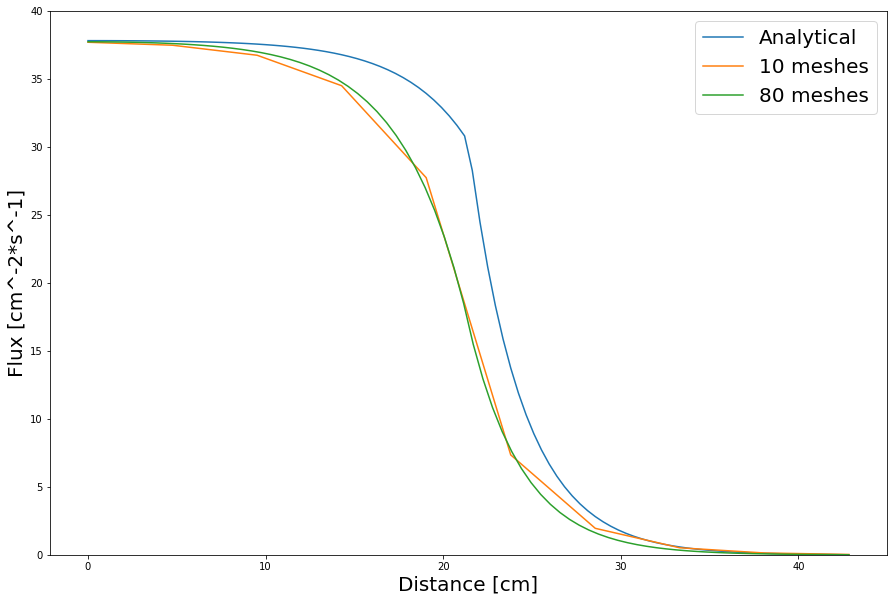

In [33]:
# Plot 10, 40 and Analytical
figure_1 = plt.figure(figsize = (15,10))
plt.xlabel('Distance [cm]' , fontsize = 20)
plt.ylabel('Flux [cm^-2*s^-1]' , fontsize = 20)
plt.plot(x_array,phi, label = "Analytical")
plt.plot(np.linspace(0,2*a,10),phi_matrix(10,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a), label = "10 meshes")
plt.plot(np.linspace(0,2*a,80),phi_matrix(80,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a),label = "80 meshes")
plt.gca().set_ylim([0,40])
#plt.title("Fixed Source Problem - Flux vs Distance (Part A)")
plt.legend(loc = "upper right",prop={'size': 20})
plt.show()

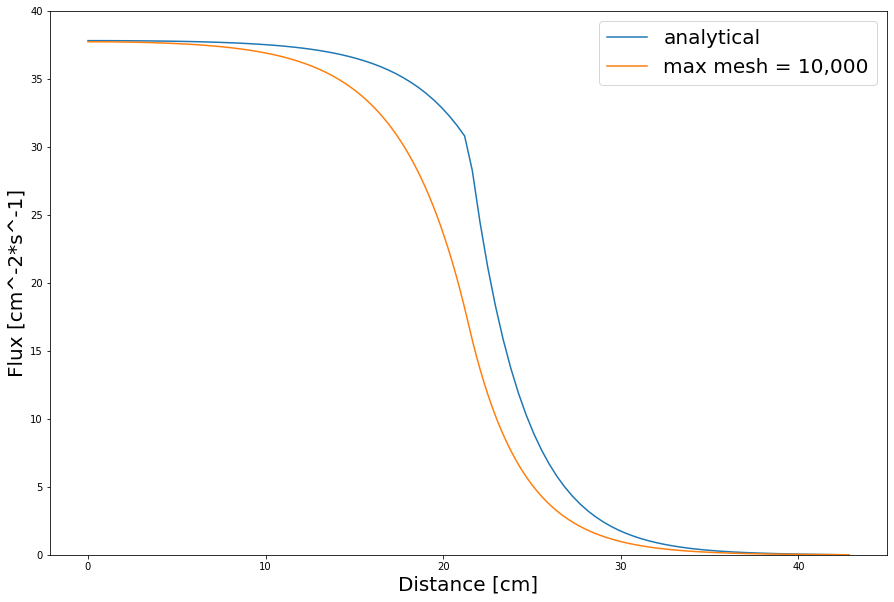

In [34]:
# Plot Max Mesh and Analytical

figure_2 = plt.figure(figsize = (15,10))
plt.xlabel('Distance [cm]' , fontsize = 20)
plt.ylabel('Flux [cm^-2*s^-1]' , fontsize = 20)
plt.plot(x_array,phi, label = "analytical")

for i in [10000]:
    plt.plot(np.linspace(0,2*a,i),phi_matrix(i,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a), label = "max mesh = 10,000")
plt.gca().set_ylim([0,40])
#plt.title("Fixed Source Problem - Flux vs Distance (Part B)")
plt.legend(loc = "upper right",prop={'size': 20})
plt.show()

In [35]:
# Numerical and Analytic Solution Convergence Behaviour
from tabulate import tabulate
m=49
phi_center_analytic = phi[m]
phi_centers = []
for z in mesh_l:
    index = int(z/2 - 1)
    matrix = phi_matrix(z,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a)
    phi_centers.append(float(phi_matrix(z,Sc,Sr,Sig_ac,Sig_ar,Dc,Dr,a)[index]))

def percent_error_calc(a,b):
    return abs(a-b)/a * 100

error = []
for i in range(len(phi_centers)):
    error.append(percent_error_calc(phi_center_analytic,phi_centers[i]))